In [12]:
library(tidyverse)

players <- read_csv("https://raw.githubusercontent.com/ssimonz-sys/dsci100-project-data/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/ssimonz-sys/dsci100-project-data/refs/heads/main/sessions.csv")

# Basic structure
glimpse(players)
glimpse(sessions)

# Quick counts
nrow(players); ncol(players)
nrow(sessions); ncol(sessions)

# Numeric summaries for players
players |> summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE)))

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

[1] 196

[1] 7

[1] 1535

[1] 5

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


## (1) Data description

### Datasets

- **players.csv**
  - 196 observations and 7 variables.
  - One row per unique player on the Minecraft research server.
  - Contains self-reported demographics and experience, plus a binary newsletter subscription outcome.

- **sessions.csv**
  - 1,535 observations and 5 variables.
  - One row per individual play session on the same server.
  - Contains timestamps for when each session started and ended.

### Variables in `players.csv`

| Variable       | Type        | Description                                                  |
|----------------|------------|--------------------------------------------------------------|
| experience     | categorical | Self-reported gaming experience (e.g., Pro, Veteran, etc.). |
| subscribe      | logical     | Whether the player subscribed to the game newsletter.       |
| hashedEmail    | character   | Anonymized player identifier (used to join with sessions).  |
| played_hours   | numeric     | Self-reported hours previously spent playing Minecraft.     |
| name           | character   | Player’s name or nickname (identifier, not a predictor).    |
| gender         | categorical | Self-reported gender.                                       |
| Age            | numeric     | Self-reported age in years.                                 |

### Variables in `sessions.csv`

| Variable            | Type      | Description                                                     |
|---------------------|----------|-----------------------------------------------------------------|
| hashedEmail         | character | Player ID matching the `players` table.                        |
| start_time          | character | Human-readable start time of the session.                      |
| end_time            | character | Human-readable end time of the session.                        |
| original_start_time | numeric   | Session start time (Unix-style timestamp, milliseconds).       |
| original_end_time   | numeric   | Session end time (Unix-style timestamp, milliseconds).         |

### Potential issues

- **Missing values:** `Age` has some missing entries; these may need imputation or removal later.
- **Skewed numeric variables:** `played_hours` appears right-skewed, with a few players reporting very large values.
- **Identifiers:** `name` and `hashedEmail` act as identifiers and are not meaningful predictors by themselves.
- **Sampling bias:** Players come from a voluntary research server, so they are not a random sample of all Minecraft players.
- **Sessions coverage:** Some players may have few or no recorded sessions, which could affect behavioural summaries.


## (2) Research Questions

### Broad Question
What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter?

### Specific Question
Can player demographics and self-reported experience (Age, gender, experience level, and played_hours) predict whether a player subscribes to the server’s newsletter?

### How the Data Help Address This Question
The `players.csv` dataset contains individual-level demographic and experience variables, including age, gender, experience level, previously played hours, and the binary subscription outcome (`subscribe`). These variables allow us to frame the problem as a supervised classification task. Since each row in the dataset corresponds to a unique player, the data are already structured in a form suitable for modeling.

No additional wrangling is required at this stage beyond ensuring that categorical variables are properly encoded (e.g., experience and gender as factors). In the final project, additional features from the `sessions.csv` dataset may be incorporated if desired, but for the planning stage, the `players.csv` file alone is sufficient to address the predictive question.


## (3): EDA & Visualization

In [15]:
# Minimal wrangling: ensure categorical vars are factors
players_clean <- players |>
  mutate(
    experience = as.factor(experience),
    gender = as.factor(gender),
    subscribe = as.factor(subscribe)
  )

In [16]:
numeric_means <- players_clean |>
  summarise(across(where(is.numeric), ~ round(mean(.x, na.rm = TRUE), 2)))

numeric_means

played_hours,Age
<dbl>,<dbl>
5.85,21.14


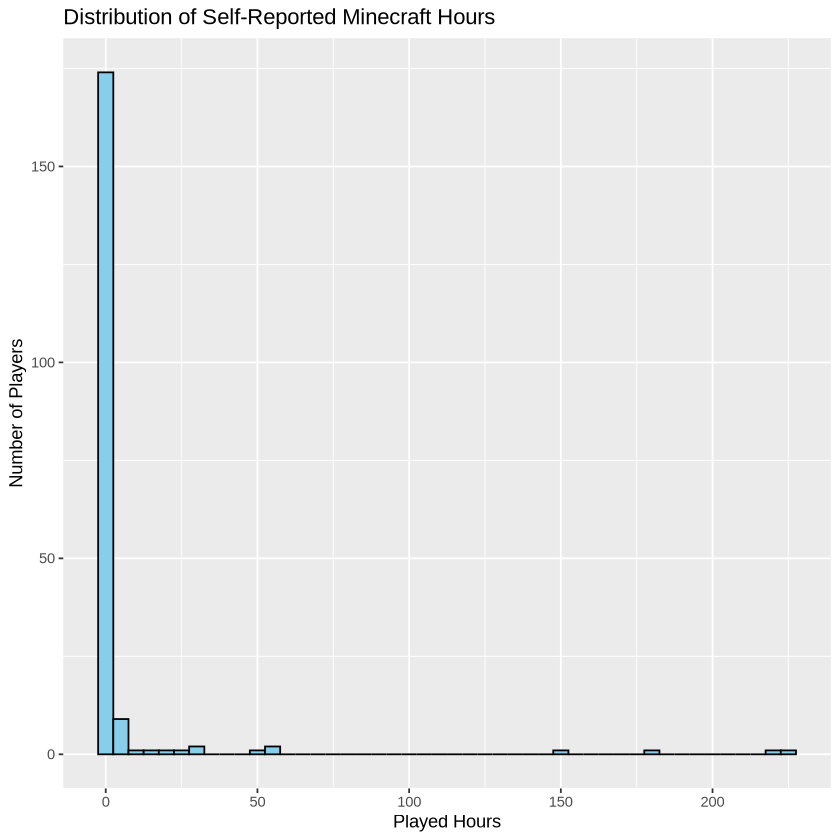

In [17]:
library(ggplot2)

ggplot(players_clean, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, color = "black", fill = "skyblue") +
  labs(
    title = "Distribution of Self-Reported Minecraft Hours",
    x = "Played Hours",
    y = "Number of Players"
  )

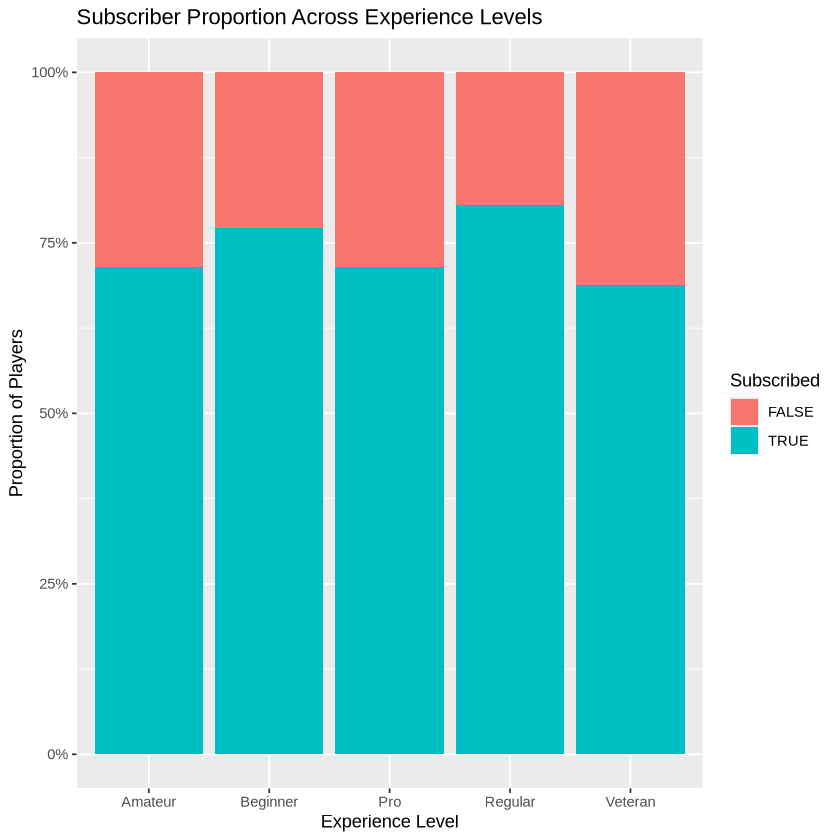

In [18]:
ggplot(players_clean, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(
    title = "Subscriber Proportion Across Experience Levels",
    x = "Experience Level",
    y = "Proportion of Players",
    fill = "Subscribed"
  )

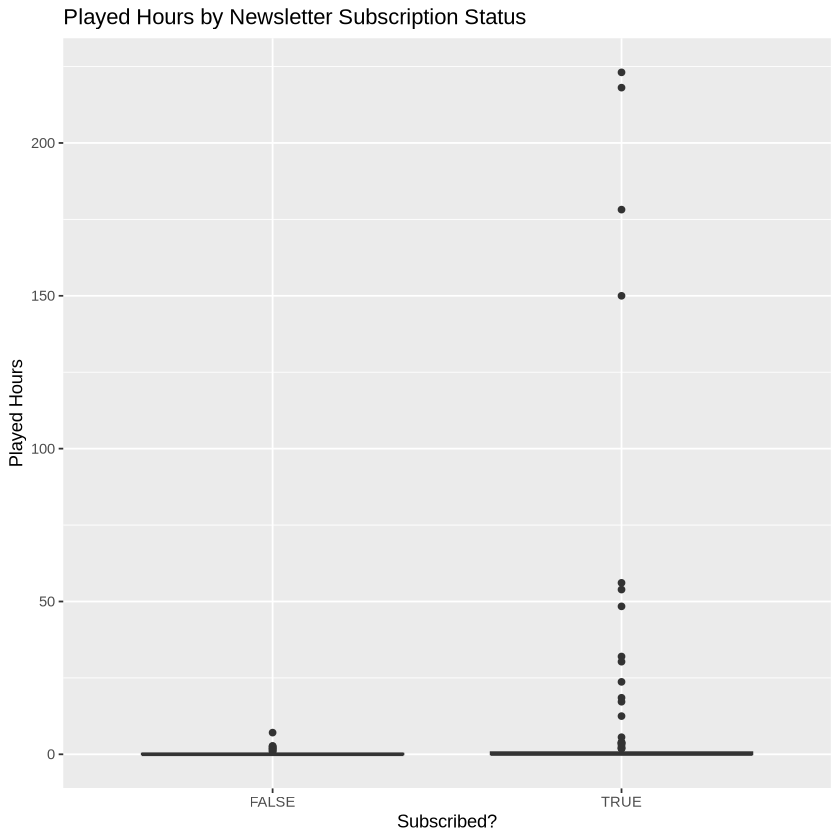

In [19]:
ggplot(players_clean, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(
    title = "Played Hours by Newsletter Subscription Status",
    x = "Subscribed?",
    y = "Played Hours"
  ) +
  theme(legend.position = "none")

### Insights from Exploratory Analysis

The histogram of `played_hours` shows a strong right-skew, where most players report relatively low playtime but a small number report very high values. This suggests the variable may benefit from scaling when used in modeling, but it still provides useful information about player engagement.

The bar chart of subscription proportion across experience levels indicates that players with higher self-reported experience appear slightly more likely to subscribe to the newsletter. Although some categories have small sample sizes, this suggests that experience level may be a meaningful predictor.

The boxplot comparing `played_hours` across subscription groups shows that subscribers tend to report higher median played hours than non-subscribers. This aligns with the idea that more engaged or experienced players may be more likely to subscribe.

Overall, the exploratory analysis supports the feasibility of predicting newsletter subscription based on demographic and experience-related variables in `players.csv`.

## (4) Methods and Plan

To address my predictive question, I plan to use a supervised classification method. The response variable, `subscribe`, is binary, which makes this a classification problem. I will begin with the k-nearest neighbours (k-NN) classifier because it is a non-parametric method covered in this course and is well suited for small datasets with mixed explanatory variable types.

### Why this method is appropriate
The k-NN classifier predicts a player’s subscription status based on the subscription patterns of players with similar characteristics. Since the dataset contains demographic and experience-related features (e.g., Age, played_hours, experience level), the distance-based approach of k-NN is a natural starting point. The method does not assume linearity or any specific functional relationship between predictors and the response, which is useful given the exploratory patterns observed in the data.

### Assumptions
While k-NN is flexible, it has several practical assumptions:
- **Meaningful distance metric:** Numeric predictors must be on comparable scales, so I will standardize quantitative variables before modeling.
- **Local smoothness:** The idea that players with similar characteristics should have similar subscription outcomes.
- **Sufficient density:** k-NN performs best when the dataset has enough observations in each region of the predictor space.

### Potential limitations
k-NN may struggle if:
- Too many predictors are included (“curse of dimensionality”).
- Important predictors are noisy or highly skewed.
- The dataset is imbalanced across subscription classes.

Additionally, k-NN can be less interpretable than parametric models like logistic regression. If this becomes a concern during the full project, I may compare k-NN with a logistic regression model.

### Model selection and evaluation
I will split the data into a **training set (approximately 75%)** and a **test set (25%)** using a stratified split to preserve the class proportions of `subscribe`. Within the training set, I will use **5-fold cross-validation** to tune the hyperparameter `k` by selecting the value that yields the highest validation accuracy.

The final model will be trained on the full training set with the selected `k`, and performance will be evaluated on the held-out test set using accuracy and, if appropriate, additional metrics such as sensitivity or ROC AUC.

### Data processing plan
- Convert categorical variables (experience, gender, subscribe) into factors.
- Standardize numeric variables before fitting k-NN.
- Create the train–test split before any cross-validation.
- Keep all wrangling steps in the notebook so that the final workflow is fully reproducible.

This plan ensures a transparent and statistically sound approach to answering my predictive question using the available dataset.


## (5) GitHub Repository
My project repository: https://github.com/ssimonz-sys/dsci100-project-data
